In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sbi.analysis.plot import  pairplot
import seaborn as sns
sns.set()

In [11]:
df = pd.read_csv('../data/beta_event_amplitude.csv',index_col=0)
label_names = ['L2 prox gbar', 'L5 prox gbar', 'L2 dist gbar', 'L5 dist gbar', 'Prox variance', 'Dist variance',
               'Prox mean time', 'Dist mean time', 'Amplitude']
df.columns = label_names

data_dict = {'gbar_evprox_1_L2Pyr_ampa': (1e-10, 1e-1), 
               'gbar_evprox_1_L5Pyr_ampa': (1e-10, 1e-1), 
               'gbar_evdist_1_L2Pyr_ampa': (1e-10, 1e-1), 
               'gbar_evdist_1_L5Pyr_ampa': (1e-10, 1e-1),
               'sigma_t_evprox_1': (1, 100),
               'sigma_t_evdist_1': (1, 100),
               't_evprox_1': (200, 300),
               't_evdist_1': (200, 300),
               'amplitude': (-10000, 0)}

In [12]:
# Simple EDA
df.describe()

,L2 prox gbar,L5 prox gbar,L2 dist gbar,L5 dist gbar,Prox variance,Dist variance,Prox mean time,Dist mean time,Amplitude
count,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000
mean,0.018298,0.047762,0.027505,0.066661,8.675723,7.627285,237.362732,269.966538,-3456.397190
std,0.010950,0.016171,0.018898,0.022484,4.422958,4.232500,7.825738,3.636607,1029.907405
min,0.000006,0.000067,0.000064,0.000011,1.001329,1.000024,200.354797,221.657013,-6367.999023
25%,0.011867,0.035077,0.012468,0.052093,6.176690,4.524401,233.111916,267.737389,-4058.037537
50%,0.015792,0.046474,0.022661,0.074476,8.586326,6.958612,236.809807,269.724854,-3467.989990
75%,0.021148,0.058100,0.037907,0.083587,10.718471,9.968032,240.711460,271.978157,-2788.046143
max,0.099811,0.099957,0.099999,0.099997,99.743340,75.734001,299.418030,297.730255,-538.686218


In [26]:
dpl = np.load('../data/dpl_sim_fitted_prior_1.npy')
# Mess with indices to find generally "normal" waveoforms (one dominant negative peak)
large_idx = np.argsort(np.abs(dpl.min(axis=1)))[-100:-90]
small_idx = np.argsort(np.abs(dpl.min(axis=1)))[100:110]

large_x = dpl[large_idx, :]
small_x = dpl[small_idx, :]


(10,)

No handles with labels found to put in legend.


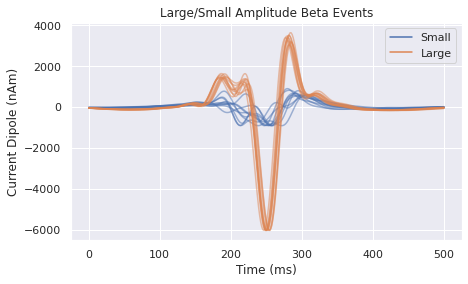

In [55]:
# Large/Small beta event
plt.figure(figsize=(7,4))
x_times = np.tile(np.linspace(0, 500, small_x.shape[1]), 10).reshape(10,-1)
plt.plot(x_times.T, small_x.T, color='C0', alpha=0.5)
plt.plot(x_times.T, large_x.T, color='C1', alpha=0.5)
plt.ylabel('Current Dipole (nAm)')
plt.xlabel('Time (ms)')
plt.title('Large/Small Amplitude Beta Events')
plt.legend()

# Fake lines for legend
plt.plot([0,0], [0,0], color='C0', alpha=1, label='Small')
plt.plot([0,0], [0,0], color='C1', alpha=1, label='Large')
plt.legend()
plt.savefig('../figures/beta_event_amplitude.png')

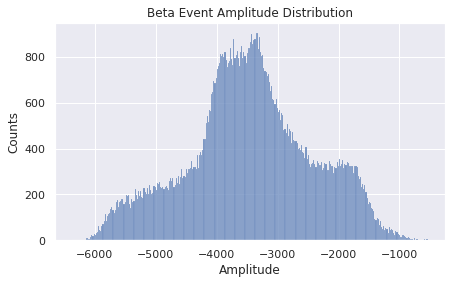

In [13]:
# Beta Event Histogram
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Amplitude', bins=int(np.sqrt(df.shape[0])))
plt.ylabel('Counts')
plt.title('Beta Event Amplitude Distribution')
plt.savefig('../figures/beta_event_amplitude_histogram.png')

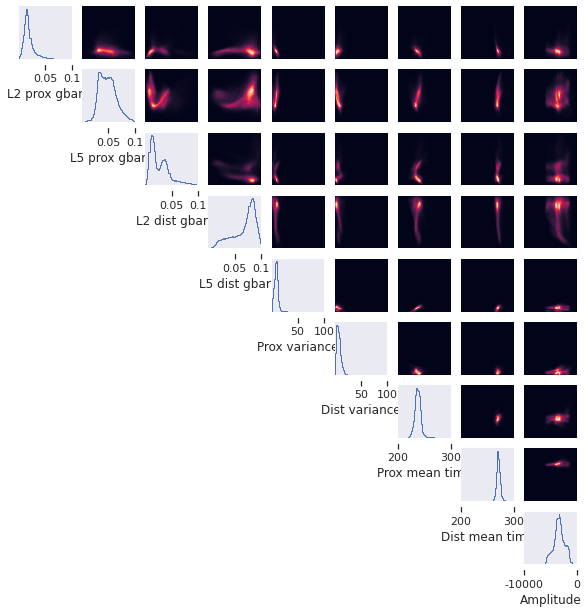

In [17]:
sns.set_style({'axes.grid' : False})
ax = pairplot(df.to_numpy(), figsize=(10,10), labels=label_names, limits=list(data_dict.values()))
sns.set_style({'axes.grid' : True})
plt.savefig('../figures/marginal_distribution.png')

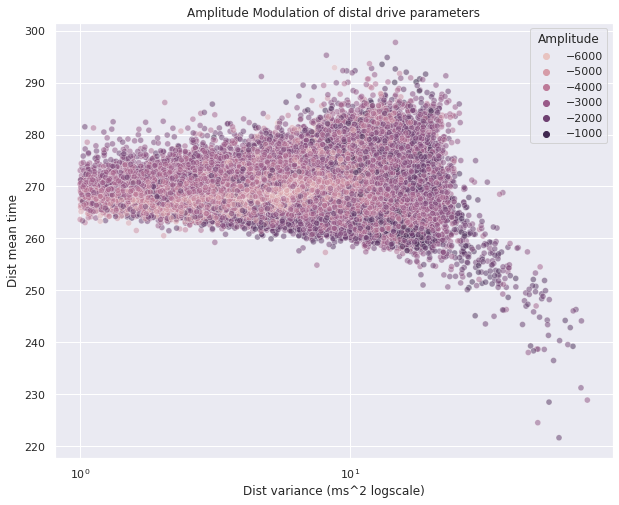

In [19]:
plt.figure(figsize=(10,8))
splot = sns.scatterplot(data=df, x ='Dist variance', y='Dist mean time', hue='Amplitude', alpha=0.5)
splot.set(xscale="log")
plt.xlabel('Dist variance (ms^2 logscale)')
plt.title('Amplitude Modulation of distal drive parameters')
plt.savefig('../figures/distal_param_amplitude.png')